In [95]:
! pip install tensorflow
! pip install matplotlib seaborn

In [96]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import tensorflow  as tf
import matplotlib.pyplot as plt

In [97]:
#Load dataset 
data= load_digits()

X= data["images"]
X= X.reshape(-1, 64)
y= data["target"]

print(X.shape)
print(y.shape)

(1797, 64)
(1797,)


In [98]:
#StandScaler and train_test_split
scaler= StandardScaler()
X= scaler.fit_transform(X)
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=.3)
print("X: ", X_train.shape, ", ", X_test.shape)
print("y: ", y_train.shape, ", ", y_test.shape)

X:  (1257, 64) ,  (540, 64)
y:  (1257,) ,  (540,)


## Modeling 

In [99]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[64]))
model.add(tf.keras.layers.Dense(256, input_dim=64, activation="relu"))
model.add(tf.keras.layers.Dense(128, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

In [100]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 64)                0         
                                                                 
 dense_18 (Dense)            (None, 256)               16640     
                                                                 
 dense_19 (Dense)            (None, 128)               32896     
                                                                 
 dense_20 (Dense)            (None, 10)                1290      
                                                                 
Total params: 50,826
Trainable params: 50,826
Non-trainable params: 0
_________________________________________________________________


In [101]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

In [102]:
history=model.fit(X_train, y_train, epochs=50, validation_split=.2)

Epoch 1/50
32/32 [==============================] - 2s 20ms/step - loss: 2.2203 - accuracy: 0.1980 - val_loss: 1.9884 - val_accuracy: 0.3770
Epoch 2/50
32/32 [==============================] - 0s 6ms/step - loss: 1.8547 - accuracy: 0.5015 - val_loss: 1.6706 - val_accuracy: 0.6389
Epoch 3/50
32/32 [==============================] - 0s 6ms/step - loss: 1.5403 - accuracy: 0.6816 - val_loss: 1.3957 - val_accuracy: 0.7698
Epoch 4/50
32/32 [==============================] - 0s 7ms/step - loss: 1.2670 - accuracy: 0.7771 - val_loss: 1.1607 - val_accuracy: 0.8254
Epoch 5/50
32/32 [==============================] - 0s 7ms/step - loss: 1.0432 - accuracy: 0.8289 - val_loss: 0.9711 - val_accuracy: 0.8532
Epoch 6/50
32/32 [==============================] - 0s 6ms/step - loss: 0.8663 - accuracy: 0.8716 - val_loss: 0.8247 - val_accuracy: 0.8690
Epoch 7/50
32/32 [==============================] - 0s 6ms/step - loss: 0.7289 - accuracy: 0.8995 - val_loss: 0.7104 - val_accuracy: 0.8810
Epoch 8/50
32/32 [=

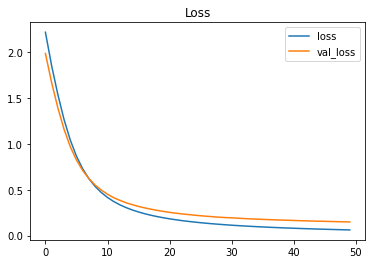

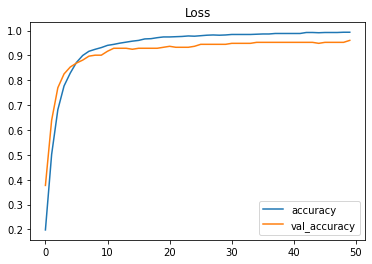

In [105]:
plt.figure()
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.title("Loss")
plt.legend()

plt.figure()
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.title("Loss")
plt.legend()